In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: 
    #
    Gram_matrix=tx.T.dot(tx)
    
    other_product=tx.T.dot(y)
    
    #we cannot be sure that the Gram matrix is invertible (See notes) hence we use the linear system solver
    #Gram_matrix_inv=np.linalg.inv(Gram_matrix)
    #w_optimal =np.dot(Gram_matrix_inv,other_product)
    w_optimal = np.linalg.solve(Gram_matrix, other_product)
    #w_optimal = np.linalg.lstsq(Gram_matrix, other_product)
    
    mse_loss=compute_loss(y,tx,w_optimal)
    # returns mse, and optimal weights
    # ***************************************************
    return mse_loss, w_optimal

def michael_least_squares(y, tx):
    w = np.linalg.solve(np.dot(tx.T,tx),np.dot(tx.T,y))
    e = y - np.dot(tx,w)
    loss = np.sqrt(2*(1/(2*len(y))*np.dot(e.T,e)))
    return w, loss

def compute_loss(y, tx, w):
    N=tx.shape[0]
    e=y-tx.dot(w)
    return ( 1/(2*N) ) * e.T.dot(e)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            w=[w0[i],w1[j]]
            losses[i,j]=compute_loss(y,tx,w)
       
    return losses[len(w0)-1,len(w1)-1], w0[i], w1[j]

def generate_w(num_intervals):
    """Generate a grid of values for w0 and w1."""
    w0 = np.linspace(-100, 200, num_intervals)
    w1 = np.linspace(-150, 150, num_intervals)
    return w0, w1

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    
    grid_w0, grid_w1 = generate_w(num_intervals=10)
    grid_loss, w0,w1=grid_search(y, tx, grid_w0, grid_w1)
    
    
    LS_loss,w_optimal=least_squares(y, tx)
    
    return LS_loss, w_optimal, grid_loss,w0,w1
    # ***************************************************
    

Test it here

In [5]:
Least_square_loss, Least_square_w, grid_search_loss, w_0, w_1 = test_your_least_squares()
print("Least Square loss: ",Least_square_loss, "Least Square weights: ", Least_square_w, \
      "\nn", "Grid Loss: ",grid_search_loss, "Grid Loss weights:", w_0, " ",w_1)

Least Square loss:  15.385887868829403 Least Square weights:  [73.293922   13.47971243] 
n Grid Loss:  17361.495447089757 Grid Loss weights: 200.0   150.0


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [7]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # INSERT YOUR CODE HERE
    # polynomial basis function: 
    theta=np.zeros((x.shape[0],degree+1))
    
     #X = np.zeros([len(x),degree])
    #for i in range(degree):
        #X[:,i] = x**(i+1)
    #return X        
    for j in range(degree):
        theta[:,j]=np.power(x,j)
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    return theta

def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [8]:
#from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        theta=build_poly(x, degree)
        print(theta.shape[0], theta.shape[1])
        print(theta[1:5,:])
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        [mse,weights]=least_squares(y, theta)
        #[mse, w]=least_squares(y, theta)
        rmse=np.sqrt(2*mse)
        # ***************************************************
        
        
        #weights, rmse = least_squares(y,X)
        
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

50 1
[[4.8951233 ]
 [1.86662437]
 [3.50706129]
 [3.38087384]]
Processing 1th experiment, degree=1, rmse=0.6273904957645271
50 3
[[  4.8951233   23.96223211 117.29808071]
 [  1.86662437   3.48428655   6.5038542 ]
 [  3.50706129  12.29947891  43.13502638]
 [  3.38087384  11.43030789  38.6444289 ]]
Processing 2th experiment, degree=3, rmse=0.2600417055386739
50 7
[[4.89512330e+00 2.39622321e+01 1.17298081e+02 5.74188568e+02
  2.81072384e+03 1.37588397e+04 6.73512170e+04]
 [1.86662437e+00 3.48428655e+00 6.50385420e+00 1.21402528e+01
  2.26612917e+01 4.23001194e+01 7.89584339e+01]
 [3.50706129e+00 1.22994789e+01 4.31350264e+01 1.51277181e+02
  5.30538347e+02 1.86063050e+03 6.52534521e+03]
 [3.38087384e+00 1.14303079e+01 3.86444289e+01 1.30651939e+02
  4.41717721e+02 1.49339188e+03 5.04896955e+03]]
Processing 3th experiment, degree=7, rmse=0.25174341909080444
50 12
[[4.89512330e+00 2.39622321e+01 1.17298081e+02 5.74188568e+02
  2.81072384e+03 1.37588397e+04 6.73512170e+04 3.29692511e+05
  1.

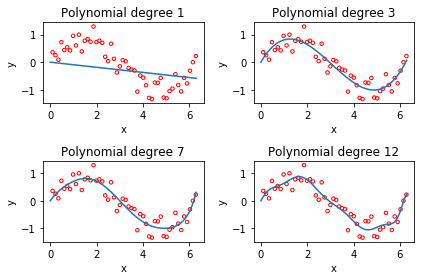

In [9]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    num_training=int(x.shape[0]*ratio)
    print(num_training)
    training_x=x[:num_training]
    training_y=y[:num_training]
    
    testing_x=x[num_training+1:]
    testing_y=y[num_training+1:]
    # ***************************************************
    return training_x, training_y, testing_x, testing_y

Then, test your `split_data` function below.

In [11]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    [training_x, training_y, testing_x, testing_y]=split_data(x, y, ratio,seed=1)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    poly_training=build_poly(training_x, degree)
    poly_testing=build_poly(testing_x, degree)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    [mse_tr,weights_tr]=least_squares(training_y, poly_training)
    [mse_te,weights_te]=least_squares(testing_y, poly_testing)

    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: 
    rmse_tr=np.sqrt(2*mse_tr)
    rmse_te=np.sqrt(2*mse_te)
    # ***************************************************
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [12]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

45
proportion=0.9, degree=1, Training RMSE=0.647, Testing RMSE=0.324
45
proportion=0.9, degree=3, Training RMSE=0.267, Testing RMSE=0.018
45
proportion=0.9, degree=7, Training RMSE=0.259, Testing RMSE=0.000
45
proportion=0.9, degree=12, Training RMSE=0.254, Testing RMSE=0.000
25
proportion=0.5, degree=1, Training RMSE=0.602, Testing RMSE=0.621
25
proportion=0.5, degree=3, Training RMSE=0.261, Testing RMSE=0.233
25
proportion=0.5, degree=7, Training RMSE=0.246, Testing RMSE=0.221
25
proportion=0.5, degree=12, Training RMSE=0.185, Testing RMSE=0.202
5
proportion=0.1, degree=1, Training RMSE=0.754, Testing RMSE=0.612
5
proportion=0.1, degree=3, Training RMSE=0.231, Testing RMSE=0.251
5
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=0.244
5
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=0.239


# 3 Ridge Regression
Please fill in the function below.

In [24]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    Gram_matrix=tx.T.dot(tx)
    other_product=tx.T.dot(y)
    lambda_prime=lambda_*2*tx.shape[0]
    
    w_optimal = np.linalg.solve((Gram_matrix+np.dot(lambda_prime,np.identity(Gram_matrix.shape[0]))), other_product)
    
    mse_loss=compute_loss(y,tx,w_optimal)
    # returns mse, and optimal weights
    # ***************************************************
    
    # ***************************************************
    return mse_loss, w_optimal

In [25]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: 
    [training_x, training_y, testing_x, testing_y]=split_data(x, y, ratio,seed=1)
    # ***************************************************
   
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: 
    poly_training=build_poly(training_x, degree)
    poly_testing=build_poly(testing_x, degree)
    # ***************************************************
    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        [mse_ridge_tr,w_ridge_tr]=ridge_regression(training_y, poly_training, lambda_)
        
        mse_ridge_te=compute_loss(testing_y,poly_testing,w_ridge_tr)
        
        rmse_tr.append(np.sqrt(2*mse_ridge_tr))
        rmse_te.append(np.sqrt(2*mse_ridge_te))
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


25
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.246, Testing RMSE=0.279
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.246, Testing RMSE=0.277
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.247, Testing RMSE=0.275
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.247, Testing RMSE=0.273
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.248, Testing RMSE=0.271
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.249, Testing RMSE=0.270
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.250, Testing RMSE=0.269
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.251, Testing RMSE=0.268
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.254, Testing RMSE=0.267
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.259, Testing RMSE=0.265
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.270, Testing RMSE=0.264
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.295, Testing RMSE=0.271
proportion=0.5, degree=7, lambda=0.19

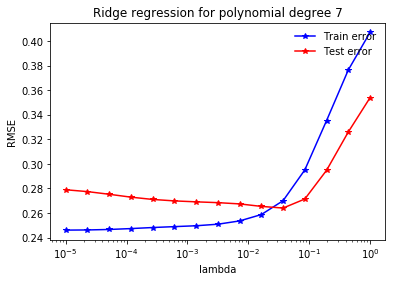

In [26]:
seed = 56
degree = 7
split_ratio = 0.5
#lambda_ = 0
#ridge_regression(y,x,lambda_)
ridge_regression_demo(x, y, degree, split_ratio, seed)